# Decision Trees

In the previous chapters we have already seen a few examples of classifiers that relied on different types of optimizations. Here we look at a completely different type of classifier which uses an approach closer to reasoning: classification or decision trees.

## Toy example

In order to understand the concept of decision trees we focus first here on a toy model where we want to classify apples as good or bad. As shown below, apples have three **features**: size, color and spots. Here each category is just binary (e.g. the size is large/small) but we could also have more possible categories.

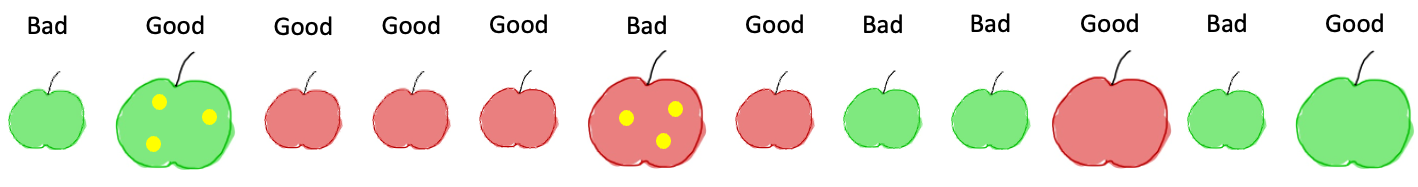

In [1]:
from IPython.display import Image
Image('../illustrations/apple_tree.png', width=900)

In addition to these features, each apple has a **label**, the property that we want to predict, which indicates if it's a good or a bad apples. Naturally, we would now try to find rules of the kind "if an apple is large, it is good" given all the examples at hand. As we have multiple features, we would naturally have a sequence of rules like "if an apple is small and it is red, then it is good". In principle, this is exactly what decision trees allow us to do: find a set of successive rules that allow us to classify each element.

## Howe to formalize rules

Naturally as humans we try reasonable assumptions given a few examples and then verify whether our rule applies to all cases, and continue until we (hopefully) find a solution. While this is doable in such small examples as above, it becomes impossible if we have tens of features and thousands of examples. In that case we need formal rules, as those followed by decision trees.

The general idea of decision trees is to 1) test multiple hypotheses to split data, 2) pick the most "informative" one, and 3) repeat the process until all items are classified.

### Creating splits

For any feature, we can create a rule and split our data into two parts. For example if we ask the question "is the apple red?" this gives us:

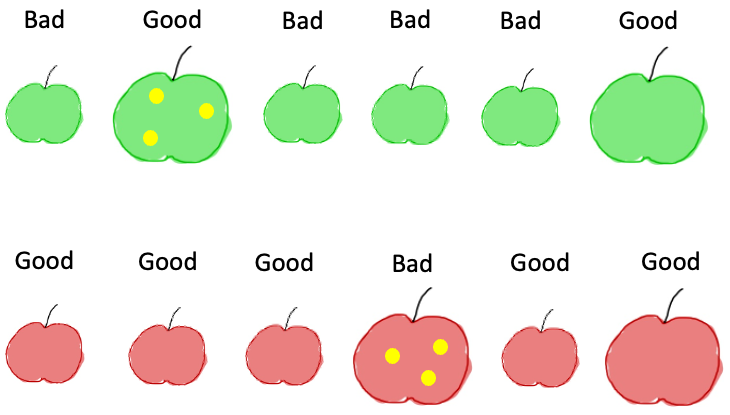

In [2]:
Image('../illustrations/apple_tree_split.png', width=400)

while if we ask "is the apple large?", we obtain:

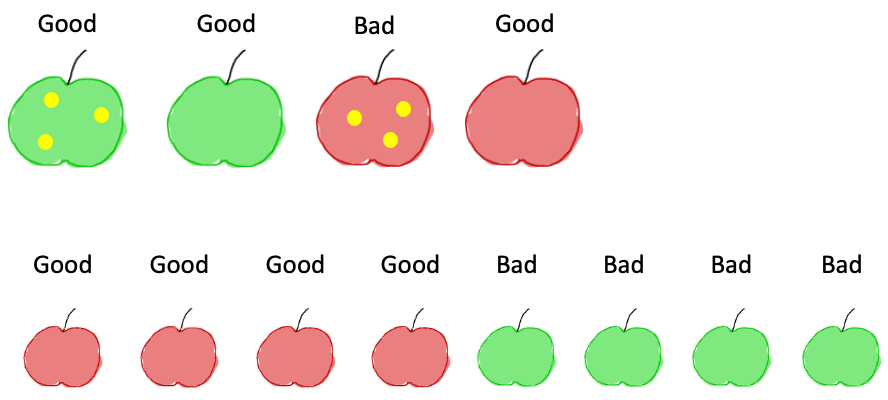

In [3]:
Image('../illustrations/apple_tree_split2.png', width=500)

We see that none of these two questions allows us to perfectly classify all elements: we have ```Good``` and ```Bad``` items in both subsets. So we will need additional questions to create finer subgroups. The questions is now: of all possible splits at each step, which one is the best?

### Best splits

Decision trees follow essentially two rules: 1) the split needs to generate two groups optimally separating the labels, and 2) the split should be informative, i.e. it should not focus on exceptions but be general.

The first rule can be fulfilled by measuring how **pure** each subset is, i.e. how much mixing of labels we have. This can be measured in different ways and one of the most common measures is the **entropy**. Entropy is used in physics and information theory to quantify disorder. Maybe you have heard about physical rules that say that entropy in a system can only grow. Imagine for example that you put blue- and yellow-tinted water in the same bottle: there is no chance that the colors will stay nicely separated. Colors will mix, breaking the nice blue/yellow separation and increasing entropy.

In the frame of classification, we can use this same entropy measure, to quantify how much our **labels** are mixed. For a binary case, the entropy is defined as $E = -p_0\log(p_0)- p_1\log(p_1) = -p_0\log(p_0) - (1-p_0)\log(1-p_0)$ where $p_i$ is the probability of a certain label, in our case just its fraction within the subset. If for example we have a group of 12 points that can be either red or blue, we can create very pure subsets (only blue or only red) perfectly mixed ones (6 red, six blue) or anything in between. If we count the fraction of red elements $p_{red}$ it would therefore be $p_{red} = 12/12 = 1$ if all points are red $p_{red}=4/12=0.3$ if we have 4 red points and 8 blue etc. For each of these $p_{red}$ values we can compute the entropy. If we plot the entropy as a function of $p_{red}$ we get the following plot:

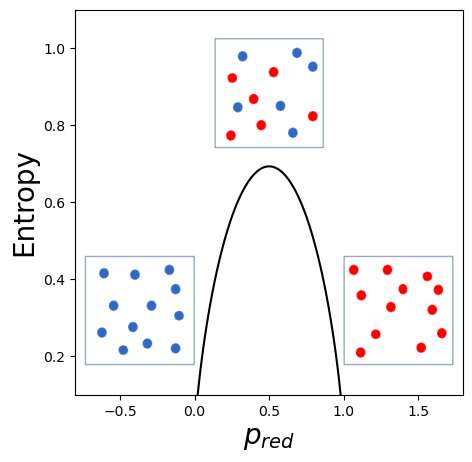

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import skimage.io

def entropy(x):
    return -x * np.log(x) - (1-x) *np.log(1-x)


fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(0.01,1,0.01), entropy(np.arange(0.01,1,0.01)),'k');
positions = ["lower left", "upper center","lower right"]
insets = [None, None, None]
for i in range(3):
    im1 = skimage.io.imread(f"../illustrations/entropy{i+1}.png")
    axins1 = inset_axes(ax, width="30%", height="40%", loc=positions[i])
    axins1.imshow(im1)
    axins1.set_axis_off()
ax.set_ylim(0.1,1.1)
ax.set_xlim(-0.8, 1.8);
ax.set_ylabel("Entropy", fontdict={'fontsize': 20});
ax.set_xlabel("$p_{red}$", fontdict={'fontsize': 20});

As one can see in this plot, the more the sample is mixed, the higher its entropy is. **Therefore when we look for the best split, we can simply test all features and keep the one resulting in subsets with the lowest entropy, i.e. the purest.**

### Information gain

Remember however that we also want our split to be as informative as possible. Obviously, we could create a specific set of different rules (or series of questions) for each type of element that appears in our dataset. But we want our model to be **general** so we want to avoid very specific rules. Therefore in the decision trees algorithm, one measures the **information** gain rather than the entropy. The information gain is just a comparison of the entropy of the current dataset with that of a possible split. It also takes into account the size of each split. So if for example, a possible split separates a dataset into a subset of just one element and a subset with all other ones, it will generally be discarded as it is too narrow. For the sake of completeness, the formula for information gain is: $IG = E_{\texttt{current}} - (\frac{n_1}{N}E_{1} + \frac{n_2}{N}E_{2})$ where $N$ is the number of items in the current set, $n_1$, and $n_2$ the number of items in each split and $E_1$ and $E_2$ the entropy of each split. As mentioned above we see that the size of the split matters: if $n_i$ is small the information gain is small.

## Splitting apples

If we follow the above rule for our apples dataset, we will end up with the following sequence of events. First, by computing IG on the original dataset, we find that the most informative feature is the color. So we get the following picture:

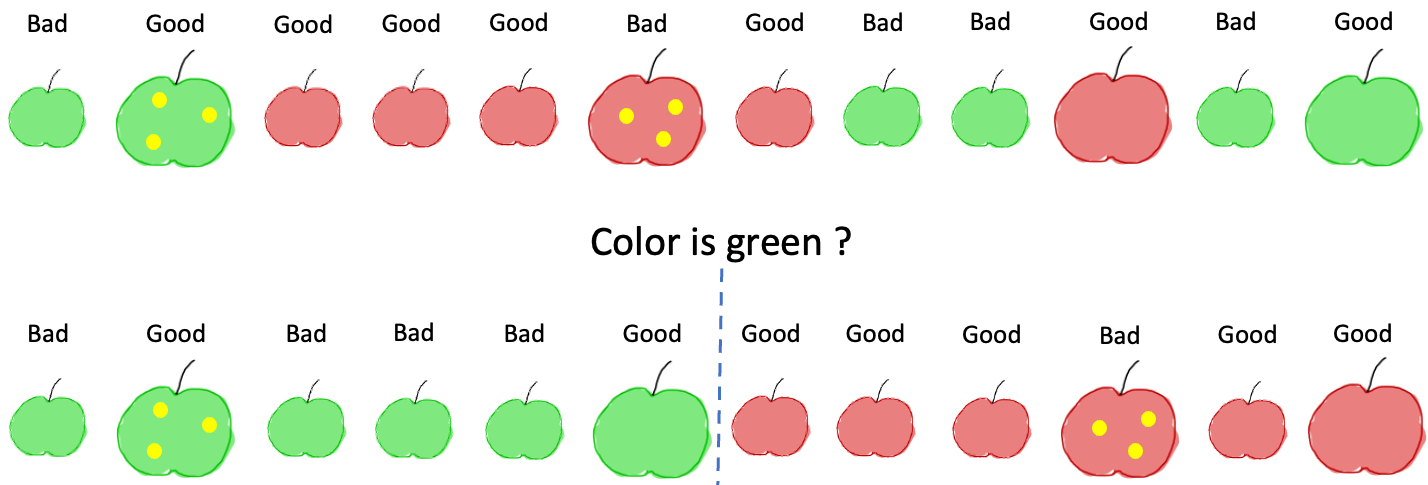

In [8]:
Image('../illustrations/apple_first_split.png', width=600)

## Recursive

Now we have two new sets and can apply the same logic as before: for each subset, which is the best feature to split again our data? If we look at the subset on the left, we see that the size gives us perfect new subsets: one contains only good apples, the other only bad ones:

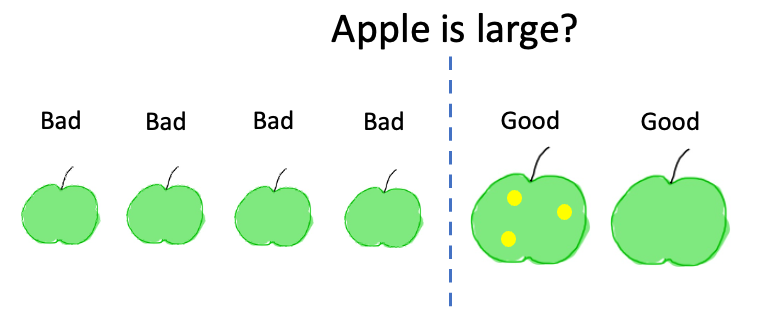

In [9]:
Image('../illustrations/apple_second_split_1.png', width=500)

For the other subset, we see that only the apple with stains is a bad one, so splitting by this feature also creates completely pure splits:

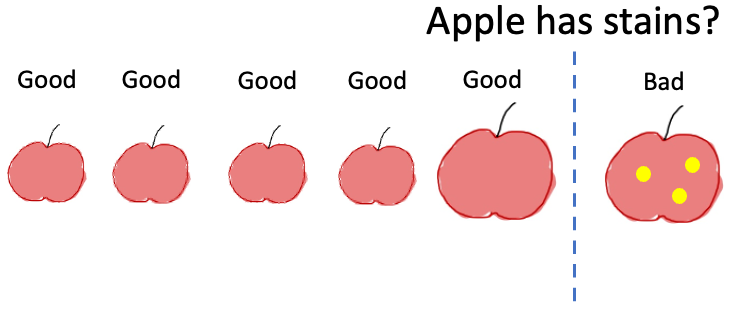

In [10]:
Image('../illustrations/apple_second_split_2.png', width=500)

## The tree

So now the process is finished as all apples have been classified correctly, and we can summarize it in the form of a tree:

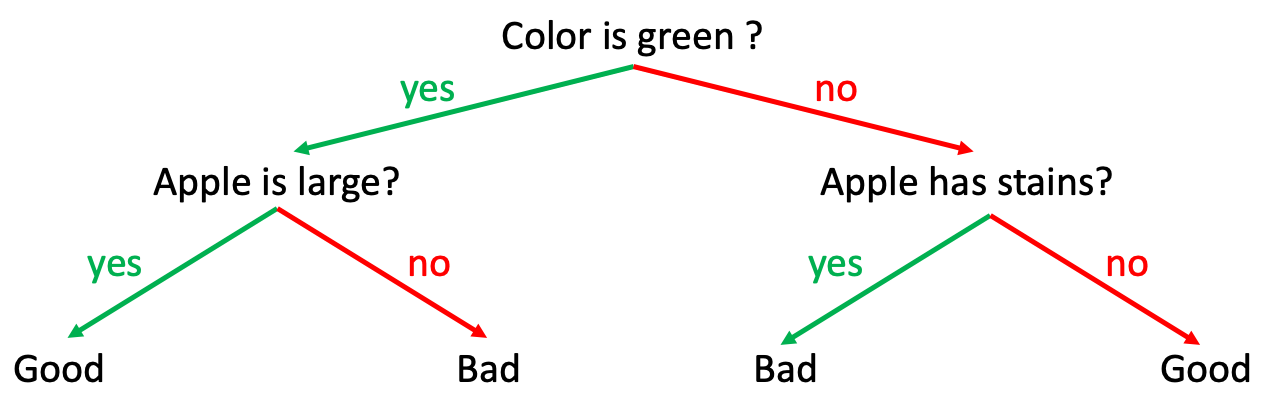

In [12]:
Image('../illustrations/apple_decision_tree.png', width=500)

If we are now given a new apple whose category is unknown, we can simply follow the tree from top to down, answer the questions and we'll get an answer!

### Non-categorical variables

In the example above, we only used categorical variables, i.e. features that have discrete values, in our case just two (large/small, red/green etc.). However the logic we followed above can easily be extended to continuous variables. For example we could imagine that the size was not quantified as large/small but as an actual value like 10cm. In such a case, the tree simply specifies a threshold, and asks e.g. "is the apple larger than 8cm". Finding the correct threshold follows the same logic as finding the best feature: maximum increase in information!

## Trees in scikit-learn

scikit-learn implements several variants of the decisions trees. We first look here at the simplest of them that implements what we described above and use again our seeds dataset:

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
import pandas as pd

seeds = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    sep='\t', on_bad_lines='skip', names=['area', 'perimeter', 'compactness', 'length', 'width', 'symmetry_coef', 'length_groove', 'seed_type']
)

Now we proceed as usual: we specify the features used to predict (like the apple's size, color etc.) and the target, in this case the seed type:

In [15]:
X = seeds[['area', 'perimeter', 'compactness', 'length', 'width', 'symmetry_coef',
       'length_groove']]
y = seeds['seed_type']

Now we create a model instance. Note that we specify here that our criterion should be ```entropy``` as explained above:

In [16]:
tree_clf = DecisionTreeClassifier(criterion='entropy')

Now we train the model:

In [17]:
tree_clf.fit(X=X, y=y)

DecisionTreeClassifier(criterion='entropy')

In the particular case of this model, we can actually visualize the model as it is a model that is "explainable" in the form of a tree:

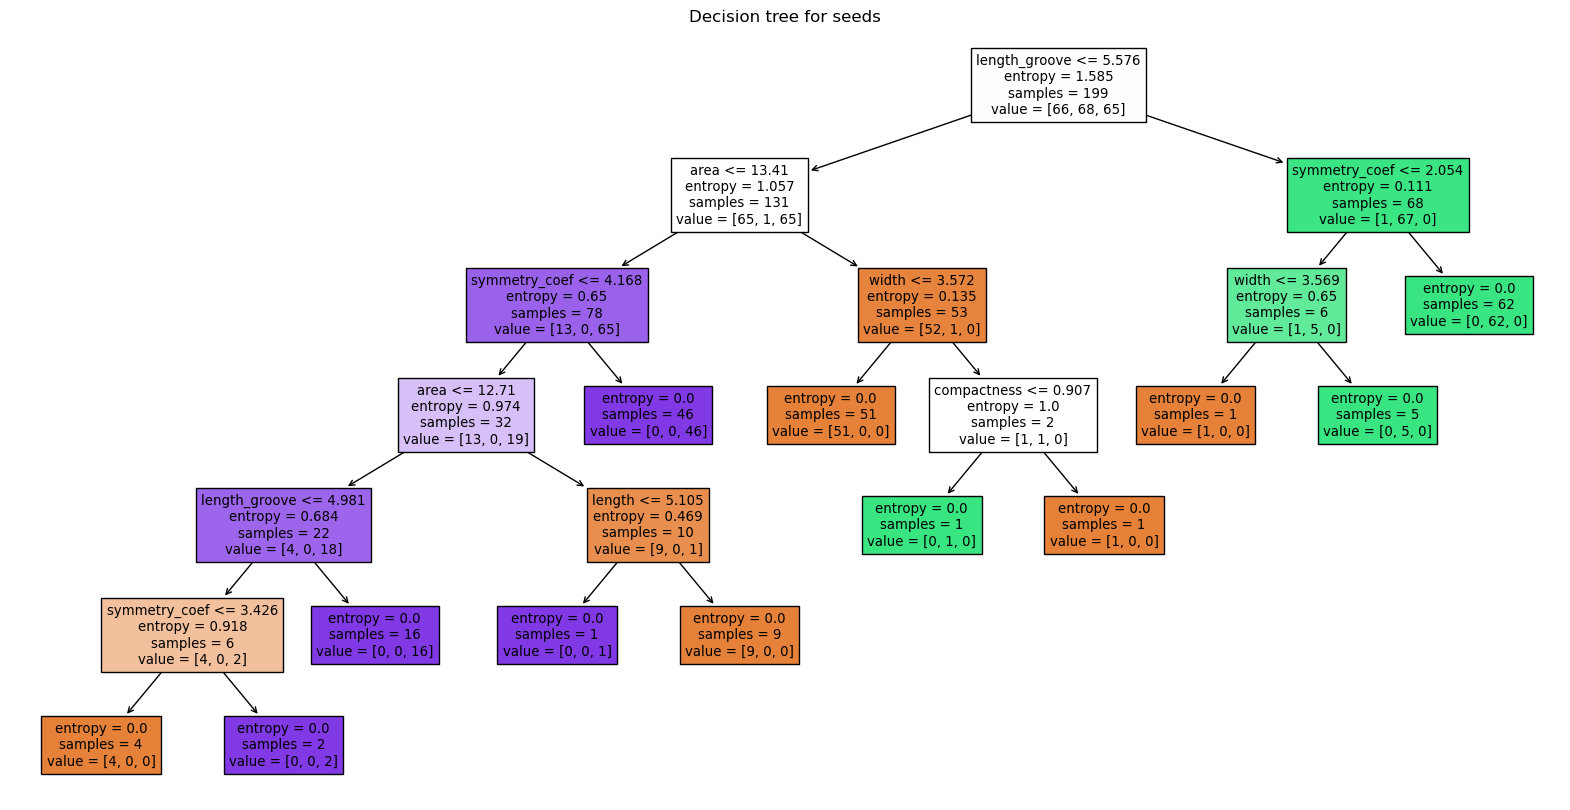

In [18]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20,10))
plot_tree(tree_clf, filled=True, ax=ax, feature_names=X.columns)
plt.title("Decision tree for seeds")
plt.show()

The tree can be interpreted as previously. Each box or node represents a question e.g. the top one "is ```length_groove``` smaller than 5.5", and the dataset is split into two, each getting a new question. For each node, we also see the entropy value, the number of samples, and to which category or ```value``` they correspond. Note that "terminal boxes" or **leaves** of the tree have here an entropy of zero, i.e. they represent perfectly pure classifications. The colors of boxes additionally represent the category, the intensity of the color reflects the purity.

Such trees are helpful as they can be naturally understood. For example, we see that the second seed type is easily split from the other two, while seed types 1 and 3 are more intertwined. We also see that the ```length_groove``` feature is the most informative one. Interestingly, it appear at multiple levels in the tree, not just at the top.

### Adjusting parameters

There are several parameters that can be adjusted when fitting such trees. For example, in our first test above, we see that we need many levels of questions, and have subsets that sometimes only contain a single element, which can indicate that the model overfits. The is because it's goal is to achieve pure subsets. We can correct for that, for example by limiting the number of levels:

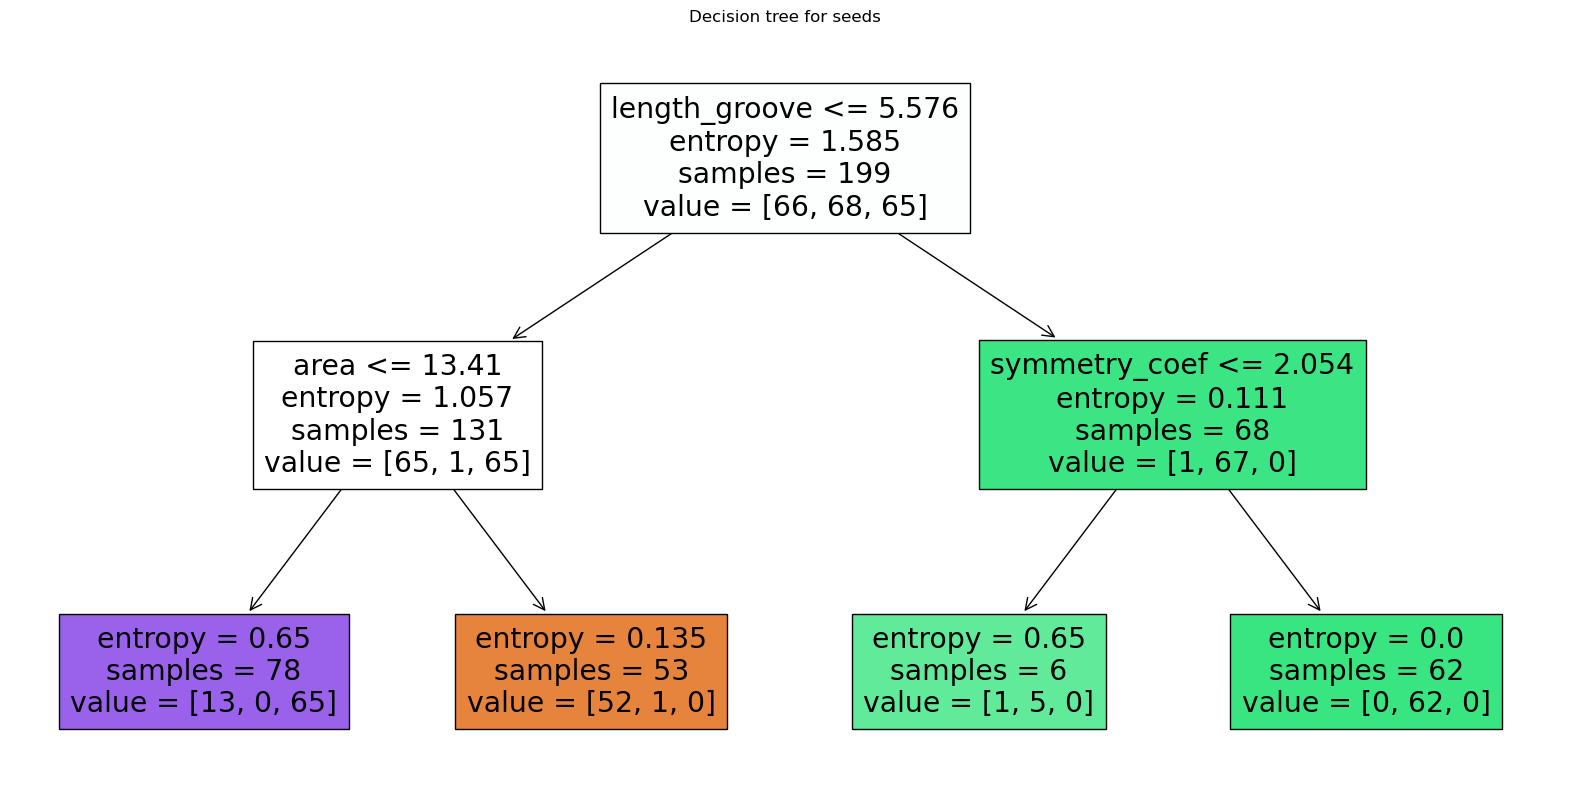

In [19]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_clf.fit(X=X, y=y)

fig, ax = plt.subplots(figsize=(20,10))
plot_tree(tree_clf, filled=True, ax=ax, feature_names=X.columns)
plt.title("Decision tree for seeds")
plt.show()

We see that now our model is much more simple, but of course performs worse than previously. Note in particular that the entropy doesn't reach zero.

Alternatively we can also specify that when we split data, we want a minimum number of elements in the split:

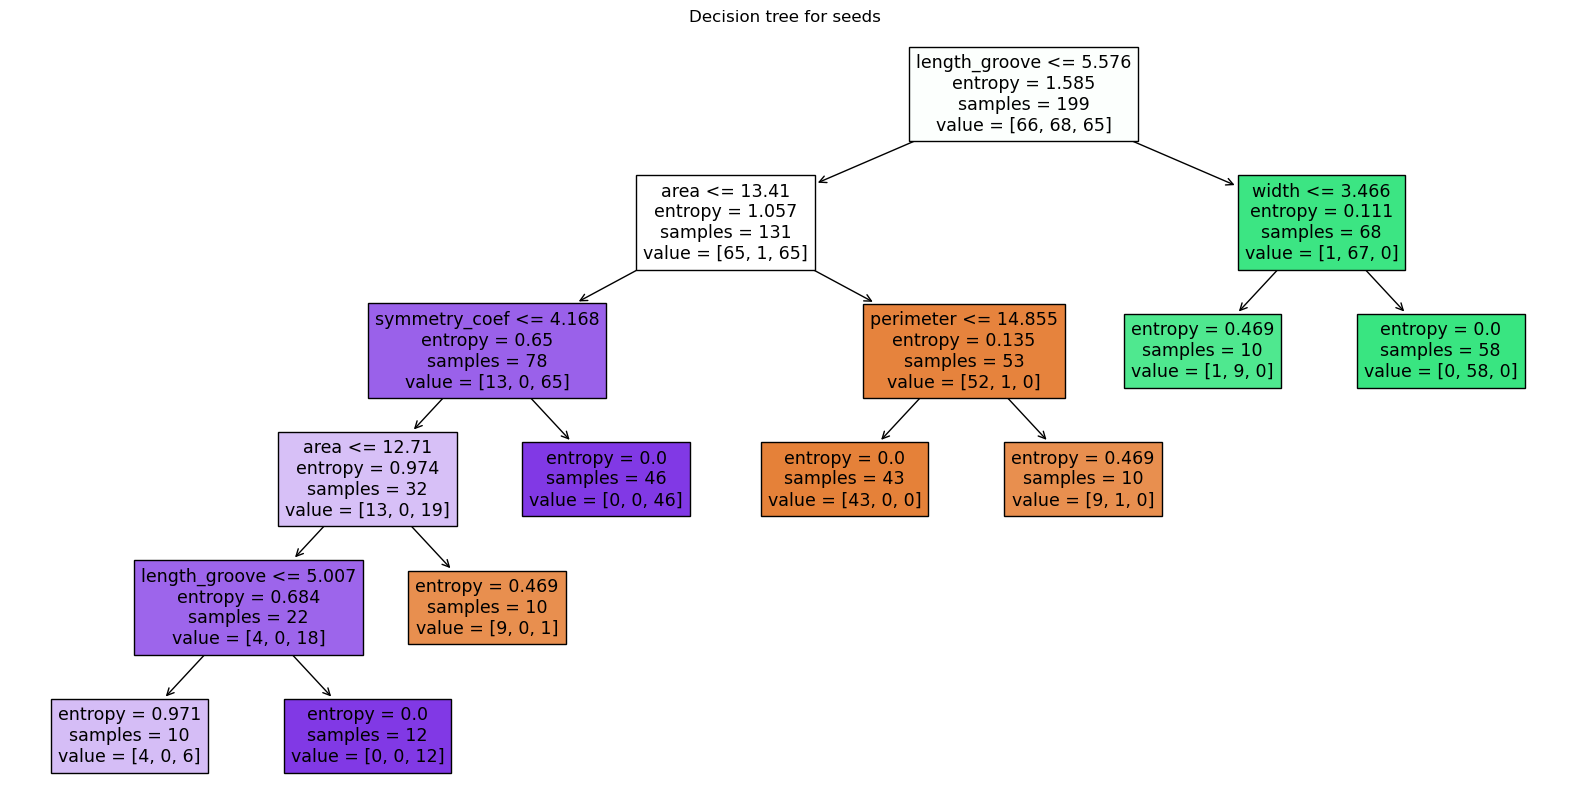

In [20]:
tree_clf = DecisionTreeClassifier(min_samples_leaf=10, criterion='entropy')
tree_clf.fit(X=X, y=y)

fig, ax = plt.subplots(figsize=(20,10))
plot_tree(tree_clf, filled=True, ax=ax, feature_names=X.columns)
plt.title("Decision tree for seeds")
plt.show()

## Other trees: random forests

One of the most popular tree based models is the random forest tree. Here we still follow the same sort of logic, but instead of creating a single tree, we create a series of them and consider a sort of "average" of all their decisions to create a final tree. As we would always get the same tree by running the algorithm on the same data, we take here samples of the full dataset and run decision trees on each sample. The advantage of this method is that it can find interesting patterns existing in subsets of the data, as the model doesn't have to satisfy *all* constraints at the same time.

We first import the classifier, which is located in the ```ensemble``` module, which gives access to many "average" algorithm, i.e. where optimization is done multiple times on data subgroups.

In [21]:
from sklearn.ensemble import RandomForestClassifier

Here we get the same options as before e.g. to limit the tree depth or the number of items per split, and additionally, we can specify on how many samples we want to run the model:

In [22]:
rf_model = RandomForestClassifier(n_estimators=50)

rf_model.fit(X=X, y=y)

RandomForestClassifier(n_estimators=50)

Here we can't draw a tree as the result is the aggregate of several trees. However we can still learn e.g. the importance of each feature:

In [23]:
pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_}).sort_values(by='importance')

,feature,importance
2,compactness,0.049427
3,length,0.058084
5,symmetry_coef,0.075661
4,width,0.134403
0,area,0.178813
1,perimeter,0.204345
6,length_groove,0.299267


We see that the ```length_grove``` is still the most informative feature.

## Exercise

1. Import the movement.csv dataset.
2. Using a DecisionTreeClassifier, try to classify movements according to their ```move_type```
3. Plot the three and observe it. Does it makes sense? Make a scatter plot of the features that appear and check that you understand the logic.